# Hierarchial Clustering

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('mall.csv')

In [29]:
data.shape

(200, 5)

In [30]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
x = data.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


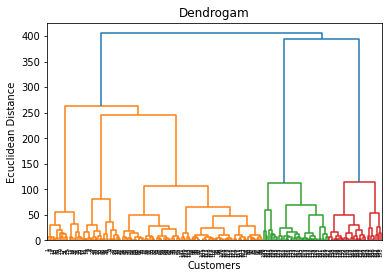

In [32]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

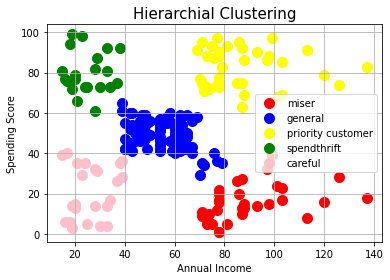

In [33]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'yellow', label = 'priority customer')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'green', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'pink', label = 'careful')

plt.title('Hierarchial Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# Text Analysis using Topic Modelling Algorithim


In [34]:
papers  = pd.read_csv('/content/drive/MyDrive/sample papers/papers.csv')

In [35]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [36]:
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
papers.head()

,year,title,abstract,paper_text
4102,2012,Timely Object Recognition,In a large visual multi-class detection framew...,Timely Object Recognition\n\nSergey Karayev\nU...
4128,2012,Minimizing Sparse High-Order Energies by Submo...,Inference on high-order graphical models has b...,Minimizing Sparse High-Order Energies by\nSubm...
94,1995,Unsupervised Pixel-prediction,Abstract Missing,Unsupervised Pixel-prediction\n\nWilliam R. So...
2340,2006,Temporal Coding using the Response Properties ...,Abstract Missing,Temporal Coding using the Response Properties\...
3116,2009,A Stochastic approximation method for inferenc...,We describe a new algorithmic framework for in...,A Stochastic approximation method for inferenc...


In [37]:
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

4102    timely object recognition\n\nsergey karayev\nu...
4128    minimizing sparse high-order energies by\nsubm...
94      unsupervised pixel-prediction\n\nwilliam r sof...
2340    temporal coding using the response properties\...
3116    a stochastic approximation method for inferenc...
Name: paper_text_processed, dtype: object

In [38]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


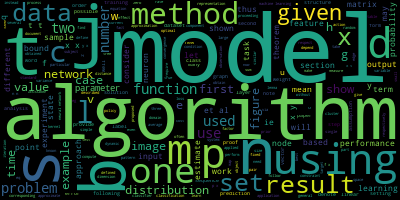

In [39]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=1000, contour_width=3, contour_color='yellow')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [40]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['timely', 'object', 'recognition', 'sergey', 'karayev', 'uc', 'berkeley', 'tobias', 'baumgartner', 'rwth', 'aachen', 'university', 'mario', 'fritz', 'mpi', 'informatics', 'trevor', 'darrell', 'uc', 'berkeley', 'abstract', 'large', 'visual', 'multi', 'class', 'detection', 'framework', 'timeliness', 'results', 'crucial']


In [41]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 2), (12, 45), (13, 32), (14, 5), (15, 2), (16, 1), (17, 1), (18, 5), (19, 1), (20, 9), (21, 2), (22, 1), (23, 1), (24, 2), (25, 1), (26, 5), (27, 9), (28, 1), (29, 1)]


In [42]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"model" + 0.006*"algorithm" + 0.006*"learning" + 0.005*"set" + '
  '0.005*"using" + 0.004*"time" + 0.004*"distribution" + 0.004*"log" + '
  '0.003*"function" + 0.003*"data"'),
 (1,
  '0.006*"learning" + 0.005*"algorithm" + 0.005*"model" + 0.004*"using" + '
  '0.004*"distribution" + 0.004*"data" + 0.004*"function" + 0.004*"number" + '
  '0.003*"matrix" + 0.003*"time"'),
 (2,
  '0.006*"learning" + 0.006*"model" + 0.006*"time" + 0.005*"data" + '
  '0.005*"algorithm" + 0.004*"using" + 0.004*"one" + 0.004*"matrix" + '
  '0.004*"function" + 0.003*"set"'),
 (3,
  '0.007*"algorithm" + 0.006*"data" + 0.006*"learning" + 0.004*"model" + '
  '0.004*"set" + 0.004*"using" + 0.003*"used" + 0.003*"one" + '
  '0.003*"distribution" + 0.003*"number"'),
 (4,
  '0.007*"learning" + 0.007*"model" + 0.005*"algorithm" + 0.005*"time" + '
  '0.005*"data" + 0.004*"using" + 0.004*"function" + 0.004*"one" + 0.003*"set" '
  '+ 0.003*"number"'),
 (5,
  '0.007*"learning" + 0.005*"model" + 0.004*"algorith

In [43]:
pip install pyLDAvis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=2cf6156029e90337c8e486fd6a0babc2380230dab189db342611db0021de7dc2
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=dd510d690a67ba2abb43e9996812fde45cc996c0db7658dd5873ca69f09a5bb9
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [44]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [45]:
import os
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.009040 -0.006626       1        1  17.986966
2      0.004240  0.003029       2        1  15.643654
4      0.001305 -0.001064       3        1  12.629138
9     -0.001879  0.008722       4        1  11.454424
7      0.006998  0.005559       5        1  10.688128
6     -0.002713  0.002718       6        1   9.095403
3     -0.001086 -0.005561       7        1   6.778337
8     -0.010518 -0.002605       8        1   6.554003
1     -0.001077 -0.005604       9        1   6.320005
5     -0.004311  0.001431      10        1   2.849942, topic_info=           Term         Freq        Total Category  logprob  loglift
617    learning  1397.000000  1397.000000  Default  30.0000  30.0000
258        data  1171.000000  1171.000000  Default  29.0000  29.0000
33    algorithm  1274.000000  1274.000000  Default  28.0000  28.0000
756         one   828.000000   828.000000  Default  27.0000  27.0000
1149        two   682.000000   682.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
562       input    14.023029   466.180598  Topic10  -6.1982   0.0540
1643     neural    13.982388   473.159443  Topic10  -6.2011   0.0362
2536     matrix    15.208827   603.759973  Topic10  -6.1170  -0.1234
1008        set    16.761719   843.357345  Topic10  -6.0198  -0.3604
1057      state    14.700043   595.945662  Topic10  -6.1510  -0.1444

[877 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
10044      3  0.360409  accounting
12         1  0.317801      action
12         2  0.131358      action
12         3  0.072035      action
12         4  0.114408      action
...      ...       ...         ...
16124      1  0.354861        zxyi
16124      2  0.236574        zxyi
16124      5  0.118287        zxyi
16124      6  0.118287        zxyi
16124      7  0.118287        zxyi

[3875 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 5, 10, 8, 7, 4, 9, 2, 6])